In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv("Downloads\FINAL_USO.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [16]:
from sklearn.model_selection import train_test_split


from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [17]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
1713,2018-12-24,119.570000,120.139999,119.570000,120.019997,120.019997,9736400,239.039993,240.839996,234.270004,...,20.650000,21.090000,21.090000,60507000,9.49,9.52,9.28,9.29,9.29,21598200
1714,2018-12-26,120.620003,121.000000,119.570000,119.660004,119.660004,14293500,235.970001,246.179993,233.759995,...,20.530001,20.620001,20.620001,76365200,9.25,9.92,9.23,9.90,9.90,40978800
1715,2018-12-27,120.570000,120.900002,120.139999,120.570000,120.570000,11874400,242.570007,248.289993,238.960007,...,20.700001,20.969999,20.969999,52393000,9.59,9.65,9.37,9.62,9.62,36578700
1716,2018-12-28,120.800003,121.080002,120.720001,121.059998,121.059998,6864700,249.580002,251.399994,246.449997,...,20.570000,20.600000,20.600000,49835000,9.54,9.65,9.38,9.53,9.53,22803400
1717,2018-12-31,120.980003,121.260002,120.830002,121.250000,121.250000,8449400,249.559998,250.190002,247.470001,...,20.559999,21.090000,21.090000,53866600,9.63,9.71,9.44,9.66,9.66,28417400


In [18]:
data.shape

(1718, 81)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

In [20]:
data.isnull().sum()

Date             0
Open             0
High             0
Low              0
Close            0
                ..
USO_High         0
USO_Low          0
USO_Close        0
USO_Adj Close    0
USO_Volume       0
Length: 81, dtype: int64

In [21]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,...,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,...,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,...,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,...,12.400000,12.470000,12.269618,4.729000e+06,7.820000,8.030000,7.670000,7.960000,7.960000,1.035100e+06
25%,116.220001,116.540001,115.739998,116.052502,116.052502,5.412925e+06,170.392498,170.962506,169.577499,170.397500,...,20.355000,20.585000,20.180950,2.259968e+07,11.420000,11.500000,11.300000,11.392500,11.392500,6.229500e+06
50%,121.915001,122.325001,121.369999,121.795002,121.795002,7.483900e+06,205.464996,206.459999,204.430000,205.529999,...,22.870001,23.054999,22.677604,3.730465e+07,16.450000,16.635001,16.040000,16.345000,16.345000,1.613015e+07
75%,128.427494,129.087498,127.840001,128.470001,128.470001,1.020795e+07,237.292500,237.722500,236.147503,236.889996,...,26.797500,27.317500,26.478154,5.697055e+07,34.419998,34.667499,34.110000,34.417499,34.417499,2.672375e+07
max,173.199997,174.070007,172.919998,173.610001,173.610001,9.380420e+07,293.089996,293.940002,291.809998,293.579987,...,56.770000,57.470001,54.617039,2.321536e+08,41.599998,42.299999,41.299999,42.009998,42.009998,1.102657e+08


<AxesSubplot:>

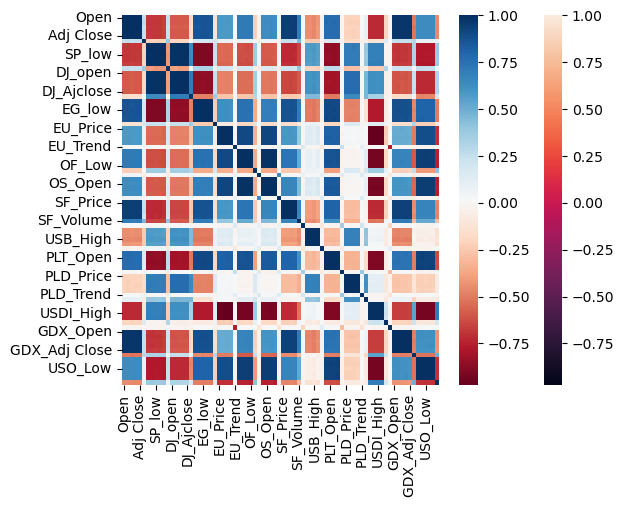

In [54]:
#Correlation-positive correlation and negative correlation
correlation=data.corr()
data.corr()
sns.heatmap(corr)
sns.heatmap(corr,cmap='RdBu')

In [32]:
#corr value of GDX_high
print(correlation['GDX_High'])


Open             0.975143
High             0.975722
Low              0.974587
Close            0.975255
Adj Close        0.975255
                   ...   
USO_High         0.616612
USO_Low          0.615705
USO_Close        0.616656
USO_Adj Close    0.616656
USO_Volume      -0.425346
Name: GDX_High, Length: 80, dtype: float64


C:\Users\saman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GDX_High', ylabel='Density'>

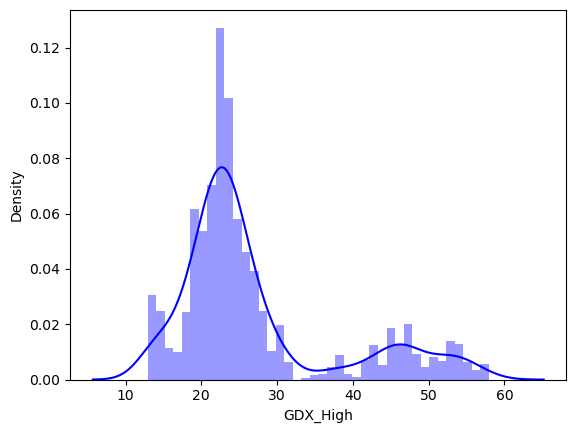

In [36]:
# checking the distribution of the GDX_High
sns.distplot(data['GDX_High'],color='blue')


In [38]:
X = data.drop(['Date','GDX_High'],axis=1)
Y = data['GDX_High']


In [39]:
print(X)

            Open        High         Low       Close   Adj Close    Volume  \
0     154.740005  154.949997  151.710007  152.330002  152.330002  21521900   
1     154.309998  155.369995  153.899994  155.229996  155.229996  18124300   
2     155.479996  155.860001  154.360001  154.869995  154.869995  12547200   
3     156.820007  157.429993  156.580002  156.979996  156.979996   9136300   
4     156.979996  157.529999  156.130005  157.160004  157.160004  11996100   
...          ...         ...         ...         ...         ...       ...   
1713  119.570000  120.139999  119.570000  120.019997  120.019997   9736400   
1714  120.620003  121.000000  119.570000  119.660004  119.660004  14293500   
1715  120.570000  120.900002  120.139999  120.570000  120.570000  11874400   
1716  120.800003  121.080002  120.720001  121.059998  121.059998   6864700   
1717  120.980003  121.260002  120.830002  121.250000  121.250000   8449400   

         SP_open     SP_high      SP_low    SP_close  ...    GD

In [40]:
print(Y)

0       53.139999
1       53.180000
2       52.549999
3       53.250000
4       53.430000
          ...    
1713    21.110001
1714    21.400000
1715    21.000000
1716    21.020000
1717    21.129999
Name: GDX_High, Length: 1718, dtype: float64


In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)


In [42]:
#RandomForest Regressor
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [43]:
test_data_prediction = regressor.predict(X_test)


In [44]:
print(test_data_prediction)


[19.28349992 22.99289986 23.06359992 17.35600027 13.6537     22.13760007
 25.20929999 26.95340025 27.87260023 21.8439998  26.69829993 19.18689995
 20.76989999 22.04939983 52.56899996 21.51310012 21.7830998  21.96109983
 23.54459974 23.50909982 42.8180991  23.41579957 42.24089987 24.17170012
 29.06310018 46.18869988 44.69040039 26.65279993 21.51840002 21.36019964
 23.93079974 21.1491999  13.8369     20.63309994 22.66489991 23.21259992
 40.64450012 22.44999985 19.13940003 45.49470029 22.38670005 21.9567998
 23.64599978 20.03309988 22.55420032 24.1435001  47.47879972 22.52690022
 18.91549978 30.55130003 18.78230016 23.97079982 27.39200014 24.37359975
 24.10479986 42.80929955 22.16990007 27.0156002  22.72800013 24.73159991
 46.56380044 46.88799992 28.04050014 14.178      17.43830019 46.21340002
 47.3615994  18.22380015 23.00739994 23.4324002  20.25059998 14.9451
 26.98730025 13.7941     17.93769961 46.99860052 30.44299956 21.14459985
 16.52599976 52.75409987 26.05129993 23.48019971 21.7919

In [45]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9996081743395807


In [46]:
# Accuracy on training data
print('Accuracy on training data: ', regressor.score(X_test, Y_test))

Accuracy on training data:  0.9996081743395807


In [47]:
Y_test = list(Y_test)


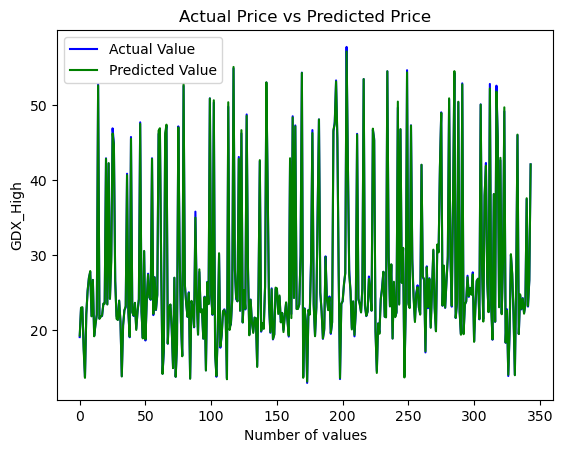

In [48]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GDX_High')
plt.legend()
plt.show()